# Alternative Polyadenylation Site Usage Prediction with Deep Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.simplefilter('ignore')

In [2]:
def correlation_matrix(df, mask, title):
    sn.heatmap(corrMatrix_all, mask=mask, cmap="YlGnBu", annot=True)
    ax.set_title(title, size=14)
    ax.tick_params(left=False, bottom=False)
    plt.tight_layout()    
    return plt.show()

In [3]:
TR = pd.read_csv('polyADB4_TR_03312025.csv')
TR

,key,gene_symbol,PasID,type_main,BchNumExp,SmpNumExp,PSE,AvgRPM,mm10.pAid,NumRefSeq,NumLRENCODE,NumLRGETx,sequence,polyAID,polyAStrength,svm_predicted_probability
0,A1BG-AS1:chr19:+:58354946:TR,A1BG-AS1,chr19:+:58354946,TR,13,27,7.4,0.22,nc,NaN,2.0,9.0,GAGCTCAGGGTGTGCACAGAACTCAGAAGTCAGACCACTGAACAGT...,0.1011,-5.2093,0.3145
1,A1BG-AS1:chr19:+:58355082:TR,A1BG-AS1,chr19:+:58355082,TR,5,5,1.4,0.28,nc,NaN,2.0,10.0,CTGTGTTTCCTTTGGCAGTCCCAACACCAGCCTCGTTGCACCCTCC...,0.1011,-10.7659,0.0348
2,A1BG-AS1:chr19:+:58355154:TR,A1BG-AS1,chr19:+:58355154,TR,26,161,44.2,1.00,nc,NaN,138.0,248.0,CTAAGGGTGGTAGCAGCTTCCTGCAAGTATCCAGCTCTGAGATTCT...,0.1011,-4.5049,0.2725
3,A1BG-AS1:chr19:+:58355182:TR,A1BG-AS1,chr19:+:58355182,TR,29,259,71.2,2.73,nc,1.0,583.0,932.0,ATCCAGCTCTGAGATTCTGCAACATCCACTTTTGCTCTCTGAGCCT...,0.1011,-6.1737,0.8970
4,A2M-AS1:chr12:+:9066985:TR,A2M-AS1,chr12:+:9066985,TR,4,5,1.4,0.15,nc,NaN,2.0,13.0,CTACGATTGTCCTCAGACTCTCTTGGCTCAATCCTCCTGCTTTAAC...,0.0323,-8.8279,0.6162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249334,ZZZ3:chr1:-:77564894:TR,ZZZ3,chr1:-:77564894,TR,6,10,2.7,0.19,chr3:+:152459104,NaN,NaN,4.0,TTAACCAGCTCATGGTGTGTGAATGTTATAAAATTGTCACTCAGAT...,0.1011,-7.1755,0.1771
249335,ZZZ3:chr1:-:77565103:TR,ZZZ3,chr1:-:77565103,TR,14,28,7.7,0.23,nc,NaN,2.0,4.0,CTTCTTTAGACAAAGTTTTAACCAATGATGGTGTTTGCTTCTAGGA...,0.5040,-7.9232,0.6443
249336,ZZZ3:chr1:-:77565255:TR,ZZZ3,chr1:-:77565255,TR,3,3,0.8,0.10,chr3:+:152458741,NaN,NaN,18.0,GATGGAACGAGAGCACACATTAAAGAGAGAGTAAATTCCAAAGGTT...,0.2197,-8.6126,0.3037
249337,ZZZ3:chr1:-:77565303:TR,ZZZ3,chr1:-:77565303,TR,2,3,0.8,0.12,nc,NaN,5.0,16.0,GGTGAATTTTTCACCACTGCGTTTTAGGTGGTGATCTTAAATGGGT...,0.0975,-10.9011,0.7470


In [4]:
TR.rename(columns={'svm_predicted_probability': 'SVM'}, inplace=True)
TR0=TR

##

## Feature Correlation

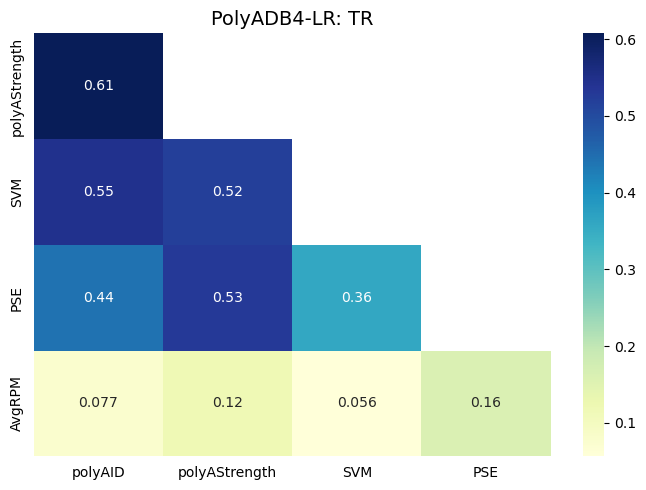

In [5]:
correlation = TR[['polyAID', 'polyAStrength', 'SVM', 'PSE', 'AvgRPM']]
correlation.head()

correlation.shape[0]
#print(TR0)

##### correlation analysis
corrMatrix_all = correlation.corr()
#print (corrMatrix_all)

##### mask
mask = np.triu(np.ones_like(corrMatrix_all, dtype=bool))# adjust mask and df
mask = mask[1:, :-1]
corrMatrix_all = corrMatrix_all.iloc[1:,:-1].copy()

fig, ax = plt.subplots(figsize= (7,5))
correlation_matrix(corrMatrix_all, mask, title='PolyADB4-LR: TR')
fig.savefig('tr_corrmatrix.png')

## 

## Profile of Cancer-related FIP1L1 and CSTF2 Genes

In [6]:
FIP1L1 = TR0[(TR0['type_main'] == "TR") & (TR0['gene_symbol'] == 'FIP1L1')]
FIP1L1 = FIP1L1[['key', 'mm10.pAid', 'polyAID', 'polyAStrength', 'SVM', 'PSE', 'AvgRPM']]
FIP1L1

,key,mm10.pAid,polyAID,polyAStrength,SVM,PSE,AvgRPM
33767,FIP1L1:chr4:+:53459346:TR,chr5:+:74595882,0.1011,-10.9408,0.6235,0.8,0.25
33768,FIP1L1:chr4:+:53459517:TR,chr5:+:74596060,0.5960,-9.0907,0.9890,8.8,0.33
33769,FIP1L1:chr4:+:53459550:TR,chr5:+:74596086,0.6118,-11.2592,0.9783,1.1,0.16
33770,FIP1L1:chr4:+:53459611:TR,chr5:+:74596143,0.9986,0.5618,0.9911,84.1,12.19
33771,FIP1L1:chr4:+:53459667:TR,chr5:+:74596198,0.9768,-7.8462,0.9750,76.6,1.80
33772,FIP1L1:chr4:+:53459881:TR,chr5:+:74596382,0.5889,-5.9104,0.4305,1.1,0.12
33773,FIP1L1:chr4:+:53460837:TR,chr5:+:74597221,0.7988,-5.8582,0.5316,23.6,0.83
33774,FIP1L1:chr4:+:53460865:TR,nc,0.8333,-5.6053,0.9554,8.0,2.07


In [7]:
FIP1L1Rank=pd.DataFrame()
FIP1L1Rank['polyAID']=FIP1L1['polyAID'].rank(ascending=True)
FIP1L1Rank['polyAStrength']=FIP1L1['polyAStrength'].rank(ascending=True)
FIP1L1Rank['SVM']=FIP1L1['SVM'].rank(ascending=True)
FIP1L1Rank['PSE']=FIP1L1['PSE'].rank(ascending=True)
FIP1L1Rank['AvgRPM']=FIP1L1['AvgRPM'].rank(ascending=True)
FIP1L1Rank['Rank'] = FIP1L1Rank.iloc[:, 0:(FIP1L1Rank.shape[1])].sum(axis=1)/5
FIP1L1Rank

,polyAID,polyAStrength,SVM,PSE,AvgRPM,Rank
33767,1.0,2.0,3.0,1.0,3.0,2.0
33768,3.0,3.0,7.0,5.0,4.0,4.4
33769,4.0,1.0,6.0,2.5,2.0,3.1
33770,8.0,8.0,8.0,8.0,8.0,8.0
33771,7.0,4.0,5.0,7.0,6.0,5.8
33772,2.0,5.0,1.0,2.5,1.0,2.3
33773,5.0,6.0,2.0,6.0,5.0,4.8
33774,6.0,7.0,4.0,4.0,7.0,5.6


In [8]:
CSTF2 = TR0[(TR0['type_main'] == "TR") & (TR0['gene_symbol'] == 'CSTF2')]
CSTF2 = CSTF2[['key', 'mm10.pAid', 'polyAID', 'polyAStrength', 'SVM', 'PSE', 'AvgRPM']]
CSTF2

,key,mm10.pAid,polyAID,polyAStrength,SVM,PSE,AvgRPM
22151,CSTF2:chrX:+:100840718:TR,chrX:+:134084247,0.1011,-9.9018,0.0463,0.8,0.39
22152,CSTF2:chrX:+:100840862:TR,chrX:+:134084388,0.4281,-8.7724,0.1326,2.2,0.22
22153,CSTF2:chrX:+:100840916:TR,chrX:+:134084453,0.9984,-4.5279,0.6831,96.2,16.79
22154,CSTF2:chrX:+:100840942:TR,nc,0.9987,-7.2748,0.6726,1.1,0.52
22155,CSTF2:chrX:+:100841027:TR,chrX:+:134084539,0.1011,-9.8880,0.5992,0.8,0.19
22156,CSTF2:chrX:+:100841097:TR,chrX:+:134084609,0.1011,-7.6371,0.6578,10.7,0.47
22157,CSTF2:chrX:+:100841171:TR,chrX:+:134084688,0.0323,-6.9326,0.6323,1.1,0.18
22158,CSTF2:chrX:+:100841413:TR,nc,0.5481,-10.6698,0.0404,0.8,0.14
22159,CSTF2:chrX:+:100841518:TR,chrX:+:134085001,0.9908,-6.7179,0.7773,48.1,0.90


In [9]:
CSTF2Rank=pd.DataFrame()
CSTF2Rank['polyAID']=CSTF2['polyAID'].rank(ascending=True)
CSTF2Rank['polyAStrength']=CSTF2['polyAStrength'].rank(ascending=True)
CSTF2Rank['SVM']=CSTF2['SVM'].rank(ascending=True)
CSTF2Rank['PSE']=CSTF2['PSE'].rank(ascending=True)
CSTF2Rank['AvgRPM']=CSTF2['AvgRPM'].rank(ascending=True)
CSTF2Rank['Rank'] = CSTF2Rank.iloc[:, 0:(CSTF2Rank.shape[1])].sum(axis=1)/5
CSTF2Rank

,polyAID,polyAStrength,SVM,PSE,AvgRPM,Rank
22151,3.0,2.0,2.0,2.0,5.0,2.8
22152,5.0,4.0,3.0,6.0,4.0,4.4
22153,8.0,9.0,8.0,9.0,9.0,8.6
22154,9.0,6.0,7.0,4.5,7.0,6.7
22155,3.0,3.0,4.0,2.0,3.0,3.0
22156,3.0,5.0,6.0,7.0,6.0,5.4
22157,1.0,7.0,5.0,4.5,2.0,3.9
22158,6.0,1.0,1.0,2.0,1.0,2.2
22159,7.0,8.0,9.0,8.0,8.0,8.0


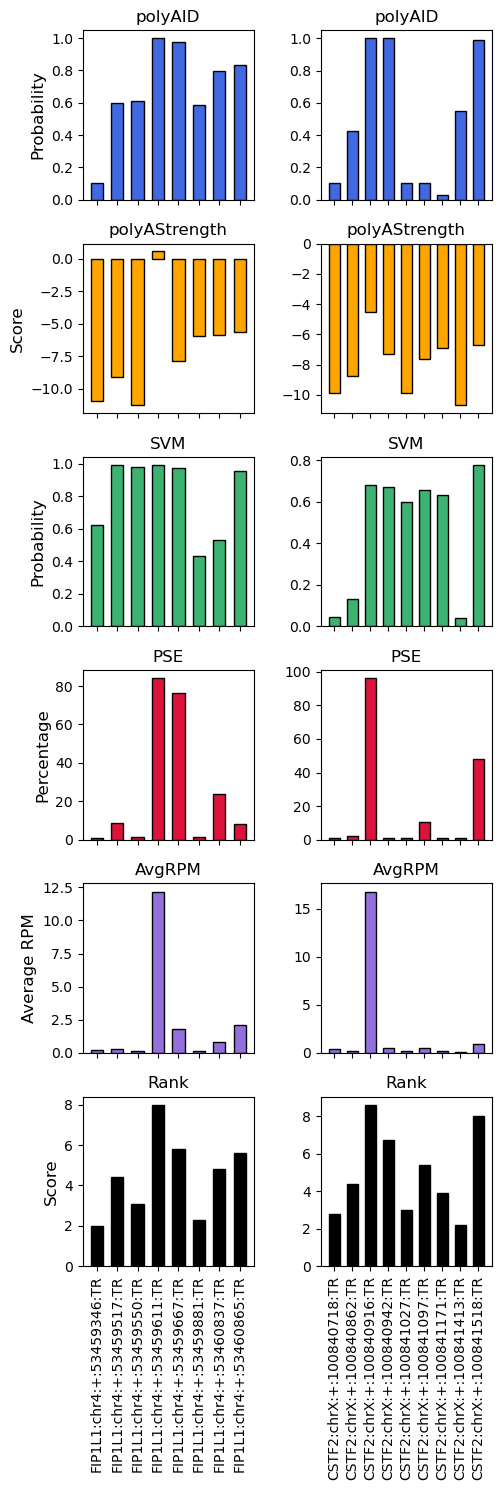

In [10]:
##### plots 
fig, axs = plt.subplots(6,2, figsize=(5,15))

### FIP1L1
### polyAID
x = np.arange(len(FIP1L1['polyAID']))
bars = [item for item in FIP1L1['polyAID']]
axs[0,0].bar(x, FIP1L1['polyAID'], color='royalblue', edgecolor="black", width=0.6)
axs[0,0].set_title('polyAID')
axs[0,0].set_ylabel('Probability', size=12)
axs[0,0].set_xticks(x)
axs[0,0].set_xticklabels('')

### polyAStrength
x = np.arange(len(FIP1L1['polyAStrength']))
bars = [item for item in FIP1L1['polyAStrength']]
axs[1,0].bar(x, FIP1L1['polyAStrength'], color='orange', edgecolor="black", width=0.6)
axs[1,0].set_title('polyAStrength')
axs[1,0].set_ylabel('Score', size=12)
axs[1,0].set_xticks(x)
axs[1,0].set_xticklabels('')

### SVM
x = np.arange(len(FIP1L1['SVM']))
bars = [item for item in FIP1L1['key']]
axs[2,0].bar(x, FIP1L1['SVM'], color='mediumseagreen', edgecolor="black", width=0.6)
axs[2,0].set_title('SVM')
axs[2,0].set_ylabel('Probability', size=12)
axs[2,0].set_xticks(x)
axs[2,0].set_xticklabels('')

### PSE
x = np.arange(len(FIP1L1['PSE']))
bars = [item for item in FIP1L1['key']]
axs[3,0].bar(x, FIP1L1['PSE'], color='crimson', edgecolor="black", width=0.6)
axs[3,0].set_title('PSE')
axs[3,0].set_ylabel('Percentage', size=12)
axs[3,0].set_xticks(x)
axs[3,0].set_xticklabels('')

### AvgRPM
x = np.arange(len(FIP1L1['AvgRPM']))
bars = [item for item in FIP1L1['key']]
axs[4,0].bar(x, FIP1L1['AvgRPM'], color='mediumpurple', edgecolor="black", width=0.6)
axs[4,0].set_title('AvgRPM')
axs[4,0].set_ylabel('Average RPM', size=12)
axs[4,0].set_xticks(x)
axs[4,0].set_xticklabels('')

### Rank
x = np.arange(len(FIP1L1Rank['Rank']))
bars = [item for item in FIP1L1['key']]
axs[5,0].bar(x, FIP1L1Rank['Rank'], color='black', edgecolor="black", width=0.6)
axs[5,0].set_title('Rank')
axs[5,0].set_ylabel('Score', size=12)
axs[5,0].set_xticks(x)
axs[5,0].set_xticklabels(bars)
axs[5,0].tick_params(axis='x', rotation=90)


### CSTF2
### polyAID
x = np.arange(len(CSTF2['polyAID']))
bars = [item for item in CSTF2['polyAID']]
axs[0,1].bar(x, CSTF2['polyAID'], color='royalblue', edgecolor="black", width=0.6)
axs[0,1].set_title('polyAID')
#axs[0,1].set_ylabel('polyAID', size=12)
axs[0,1].set_xticks(x)
axs[0,1].set_xticklabels('')

### polyAStrength
x = np.arange(len(CSTF2['polyAStrength']))
bars = [item for item in CSTF2['polyAStrength']]
axs[1,1].bar(x, CSTF2['polyAStrength'], color='orange', edgecolor="black", width=0.6)
axs[1,1].set_title('polyAStrength')
#axs[1,1].set_ylabel('polyAStrength', size=12)
axs[1,1].set_xticks(x)
axs[1,1].set_xticklabels('')

### SVM
x = np.arange(len(CSTF2['SVM']))
bars = [item for item in CSTF2['key']]
axs[2,1].bar(x, CSTF2['SVM'], color='mediumseagreen', edgecolor="black", width=0.6)
axs[2,1].set_title('SVM')
#axs[2,1].set_ylabel('SVM', size=12)
axs[2,1].set_xticks(x)
axs[2,1].set_xticklabels('')

### PSE
x = np.arange(len(CSTF2['PSE']))
bars = [item for item in CSTF2['key']]
axs[3,1].bar(x, CSTF2['PSE'], color='crimson', edgecolor="black", width=0.6)
axs[3,1].set_title('PSE')
#axs[3,1].set_ylabel('PSE', size=12)
axs[3,1].set_xticks(x)
axs[3,1].set_xticklabels('')

### AvgRPM
x = np.arange(len(CSTF2['AvgRPM']))
bars = [item for item in CSTF2['key']]
axs[4,1].bar(x, CSTF2['AvgRPM'], color='mediumpurple', edgecolor="black", width=0.6)
axs[4,1].set_title('AvgRPM')
#axs[4,1].set_ylabel('Average RPM', size=12)
axs[4,1].set_xticks(x)
axs[4,1].set_xticklabels('')

### Rank
x = np.arange(len(CSTF2Rank['Rank']))
bars = [item for item in CSTF2['key']]
axs[5,1].bar(x, CSTF2Rank['Rank'], color='black', edgecolor="black", width=0.6)
axs[5,1].set_title('Rank')
#axs[5,1].set_ylabel('Score', size=12)
axs[5,1].set_xticks(x)
axs[5,1].set_xticklabels(bars)
axs[5,1].tick_params(axis='x', rotation=90)


plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

fig.savefig('genes_FIP1L1_CSTF2.png')

##

## Profile of Age-related RRAS2 Gene

In [12]:
###### RRAS2 = TR0[(TR0['type_main'] == "TR") & (TR0['gene_symbol'] == 'RRAS2')]
RRAS2 = TR0[(TR0['type_main'] == "TR") & (TR0['gene_symbol'] == 'RRAS2')]
RRAS2 = RRAS2[['key', 'mm10.pAid', 'polyAID', 'polyAStrength', 'SVM', 'PSE', 'AvgRPM']]
RRAS2

,key,mm10.pAid,polyAID,polyAStrength,SVM,PSE,AvgRPM
216093,RRAS2:chr11:-:14277918:TR,chr7:-:114046783,0.7682,-5.1554,0.8949,79.9,10.21
216094,RRAS2:chr11:-:14277951:TR,chr7:-:114046809,0.1011,-9.6575,0.4724,0.8,0.13
216095,RRAS2:chr11:-:14278038:TR,chr7:-:114046893,0.1011,-7.1129,0.9391,3.6,0.16
216096,RRAS2:chr11:-:14278071:TR,chr7:-:114046924,0.1011,-8.1437,0.2673,0.8,0.22
216097,RRAS2:chr11:-:14278211:TR,chr7:-:114047068,0.0323,-7.8886,0.3851,0.8,0.16
216098,RRAS2:chr11:-:14278297:TR,chr7:-:114047141,0.1847,-6.4157,0.1487,1.6,0.25
216099,RRAS2:chr11:-:14278358:TR,chr7:-:114047192,0.3400,-11.1331,0.6712,1.1,0.10
216100,RRAS2:chr11:-:14278447:TR,chr7:-:114047264,0.1011,-8.0121,0.9396,1.9,0.29
216101,RRAS2:chr11:-:14278492:TR,chr7:-:114047319,0.4783,-7.7329,0.4428,40.9,0.76
216102,RRAS2:chr11:-:14278530:TR,nc,0.4685,-8.4338,0.9115,1.9,0.11


In [13]:
RRAS2Rank=pd.DataFrame()
RRAS2Rank['polyAID']=RRAS2['polyAID'].rank(ascending=True)
RRAS2Rank['polyAStrength']=RRAS2['polyAStrength'].rank(ascending=True)
RRAS2Rank['SVM']=RRAS2['SVM'].rank(ascending=True)
RRAS2Rank['PSE']=RRAS2['PSE'].rank(ascending=True)
RRAS2Rank['AvgRPM']=RRAS2['AvgRPM'].rank(ascending=True)
RRAS2Rank['Rank'] = RRAS2Rank.iloc[:, 0:(RRAS2Rank.shape[1])].sum(axis=1)/5
RRAS2Rank

,polyAID,polyAStrength,SVM,PSE,AvgRPM,Rank
216093,24.0,24.0,20.0,23.0,24.0,23.0
216094,9.0,6.0,13.0,3.0,6.0,7.4
216095,9.0,19.0,22.0,16.0,8.5,14.9
216096,9.0,13.0,9.0,3.0,11.5,9.1
216097,1.5,15.0,11.0,3.0,8.5,7.8
216098,16.0,22.0,6.0,9.5,13.5,13.4
216099,17.0,2.0,16.0,6.5,1.0,8.5
216100,9.0,14.0,23.0,12.5,17.0,15.1
216101,20.0,16.0,12.0,21.0,20.0,17.8
216102,19.0,10.0,21.0,12.5,2.5,13.0


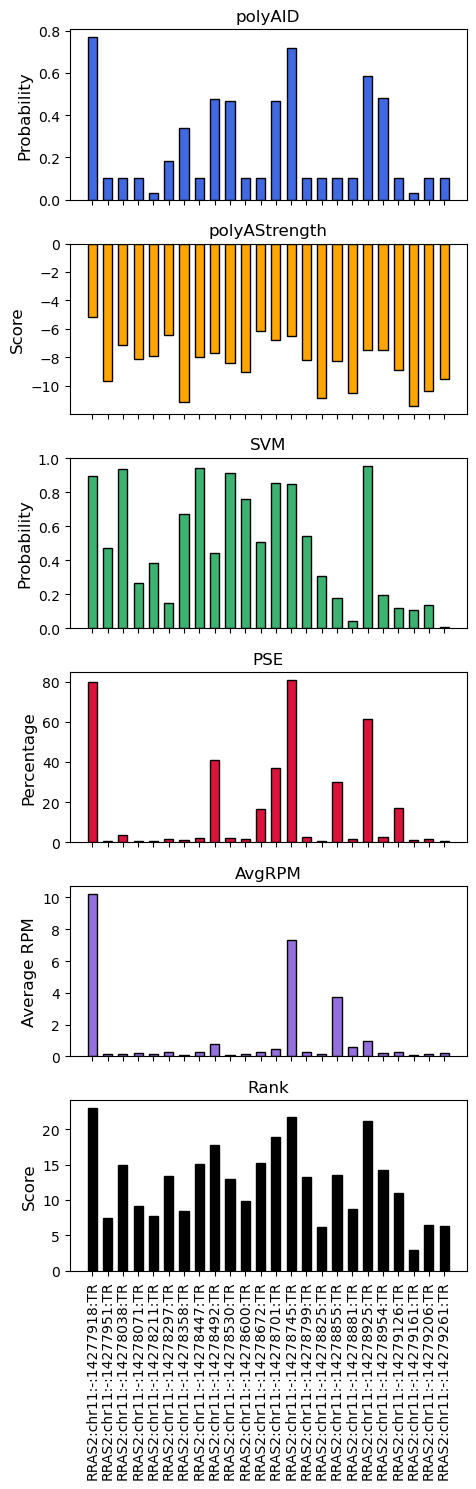

In [14]:
##### plots
fig, axs = plt.subplots(6, figsize=(5,15))

### RRAS2
### polyAID
x = np.arange(len(RRAS2['polyAID']))
bars = [item for item in RRAS2['polyAID']]
axs[0].bar(x, RRAS2['polyAID'], color='royalblue', edgecolor="black", width=0.6)
axs[0].set_title('polyAID')
axs[0].set_ylabel('Probability', size=12)
axs[0].set_xticks(x)
axs[0].set_xticklabels('')

### polyAStrength
x = np.arange(len(RRAS2['polyAStrength']))
bars = [item for item in RRAS2['polyAStrength']]
axs[1].bar(x, RRAS2['polyAStrength'], color='orange', edgecolor="black", width=0.6)
axs[1].set_title('polyAStrength')
axs[1].set_ylabel('Score', size=12)
axs[1].set_xticks(x)
axs[1].set_xticklabels('')

### SVM
x = np.arange(len(RRAS2['SVM']))
bars = [item for item in RRAS2['key']]
axs[2].bar(x, RRAS2['SVM'], color='mediumseagreen', edgecolor="black", width=0.6)
axs[2].set_title('SVM')
axs[2].set_ylabel('Probability', size=12)
axs[2].set_xticks(x)
axs[2].set_xticklabels('')

### PSE
x = np.arange(len(RRAS2['PSE']))
bars = [item for item in RRAS2['key']]
axs[3].bar(x, RRAS2['PSE'], color='crimson', edgecolor="black", width=0.6)
axs[3].set_title('PSE')
axs[3].set_ylabel('Percentage', size=12)
axs[3].set_xticks(x)
axs[3].set_xticklabels('')

### AvgRPM
x = np.arange(len(RRAS2['AvgRPM']))
bars = [item for item in RRAS2['key']]
axs[4].bar(x, RRAS2['AvgRPM'], color='mediumpurple', edgecolor="black", width=0.6)
axs[4].set_title('AvgRPM')
axs[4].set_ylabel('Average RPM', size=12)
axs[4].set_xticks(x)
axs[4].set_xticklabels('')

### Rank
x = np.arange(len(RRAS2Rank['Rank']))
bars = [item for item in RRAS2['key']]
axs[5].bar(x, RRAS2Rank['Rank'], color='black', edgecolor="black", width=0.6)
axs[5].set_title('Rank')
axs[5].set_ylabel('Score', size=12)
axs[5].set_xticks(x)
axs[5].set_xticklabels(bars)
axs[5].tick_params(axis='x', rotation=90)


plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

fig.savefig('gene_RRAS2.png')

##

## Profile of Skin-related NUDT21 Gene

In [15]:
NUDT21 = TR0[(TR0['type_main'] == "TR") & (TR0['gene_symbol'] == 'NUDT21')]
NUDT21 = NUDT21[['key', 'mm10.pAid', 'polyAID', 'polyAStrength', 'SVM', 'PSE', 'AvgRPM']]
NUDT21

,key,mm10.pAid,polyAID,polyAStrength,SVM,PSE,AvgRPM
199081,NUDT21:chr16:-:56429141:TR,nc,0.9997,-1.3675,0.9925,60.7,1.37
199082,NUDT21:chr16:-:56429167:TR,chr8:-:94015532,0.9598,-11.0133,0.7439,7.4,0.32
199083,NUDT21:chr16:-:56429321:TR,nc,0.1011,-7.9565,0.2097,1.1,0.16
199084,NUDT21:chr16:-:56429352:TR,chr8:-:94015810,0.1011,-10.0766,0.2251,0.8,0.12
199085,NUDT21:chr16:-:56429402:TR,nc,0.0892,-11.4992,0.8152,0.8,0.25
199086,NUDT21:chr16:-:56429526:TR,nc,0.4288,-7.2502,0.8523,2.2,0.20
199087,NUDT21:chr16:-:56429635:TR,nc,0.1011,-8.2659,0.0878,0.8,0.32
199088,NUDT21:chr16:-:56429760:TR,nc,0.1011,-7.9133,0.1451,1.1,0.12
199089,NUDT21:chr16:-:56429872:TR,nc,0.1011,-9.7569,0.2597,2.7,0.16
199090,NUDT21:chr16:-:56429930:TR,nc,0.4620,-8.4487,0.0728,1.4,0.26


In [16]:
NUDT21Rank=pd.DataFrame()
NUDT21Rank['polyAID']=NUDT21['polyAID'].rank(ascending=True)
NUDT21Rank['polyAStrength']=NUDT21['polyAStrength'].rank(ascending=True)
NUDT21Rank['SVM']=NUDT21['SVM'].rank(ascending=True)
NUDT21Rank['PSE']=NUDT21['PSE'].rank(ascending=True)
NUDT21Rank['AvgRPM']=NUDT21['AvgRPM'].rank(ascending=True)
NUDT21Rank['Rank'] = NUDT21Rank.iloc[:, 0:(NUDT21Rank.shape[1])].sum(axis=1)/5
NUDT21Rank

,polyAID,polyAStrength,SVM,PSE,AvgRPM,Rank
199081,49.0,49.0,49.0,45.0,45.0,47.4
199082,45.0,5.0,38.0,43.0,37.0,33.6
199083,18.5,36.0,18.0,18.0,10.0,20.1
199084,18.5,18.0,20.0,6.5,2.5,13.1
199085,7.0,2.0,40.0,6.5,31.0,17.3
199086,30.0,40.0,41.0,32.0,17.0,32.0
199087,18.5,34.0,11.0,6.5,37.0,21.4
199088,18.5,37.0,15.0,18.0,2.5,18.2
199089,18.5,21.0,21.0,35.5,10.0,21.2
199090,32.0,31.0,10.0,24.5,34.0,26.3


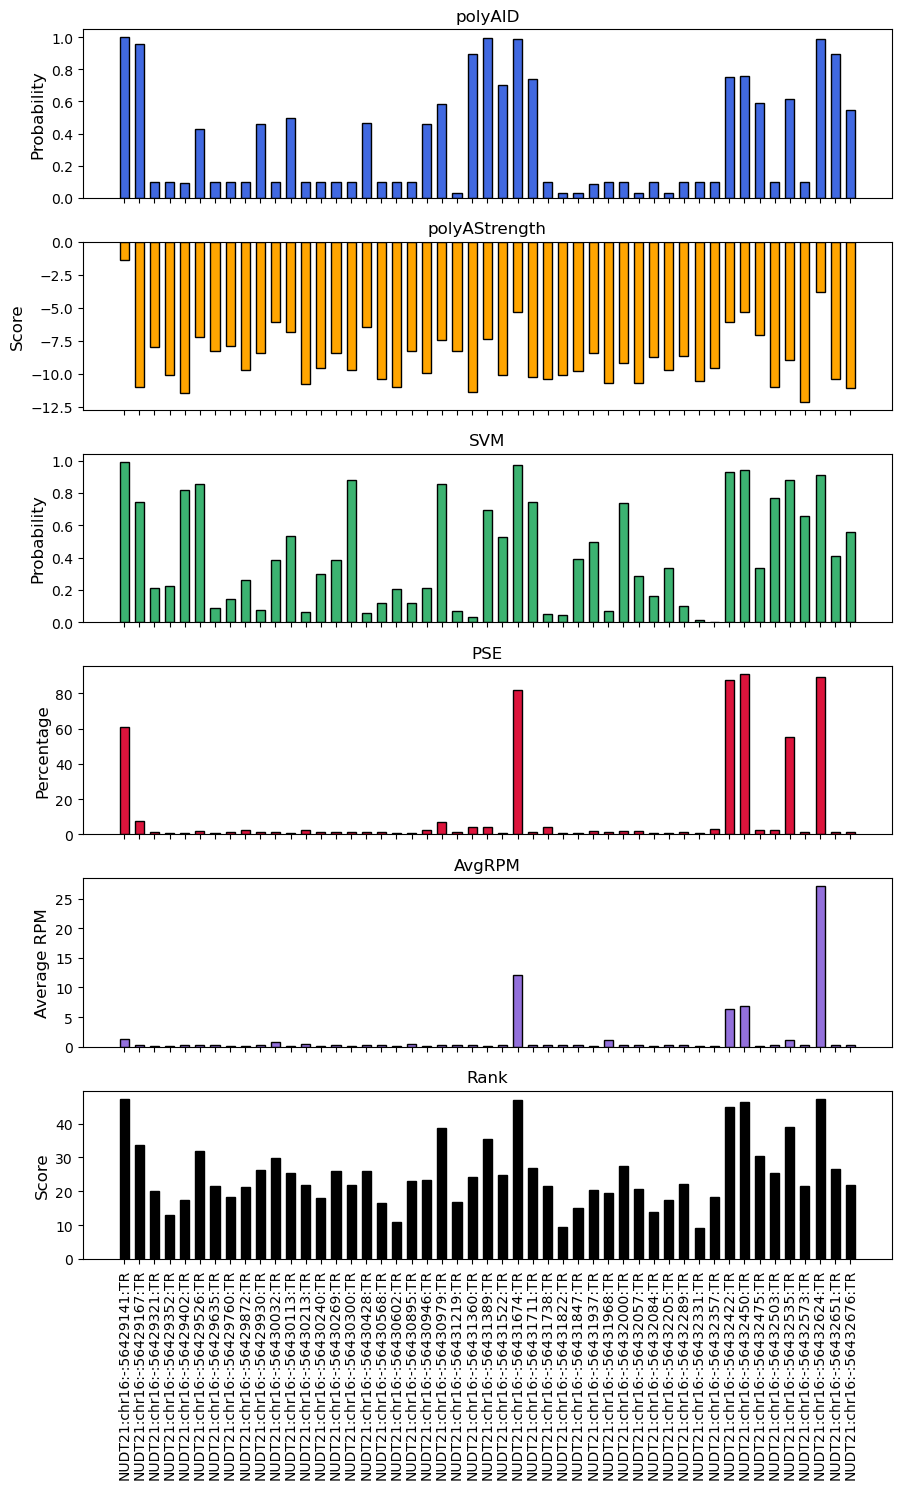

In [17]:
##### plots
fig, axs = plt.subplots(6, figsize=(9,15))

### NUDT21
### polyAID
x = np.arange(len(NUDT21['polyAID']))
bars = [item for item in NUDT21['polyAID']]
axs[0].bar(x, NUDT21['polyAID'], color='royalblue', edgecolor="black", width=0.6)
axs[0].set_title('polyAID')
axs[0].set_ylabel('Probability', size=12)
axs[0].set_xticks(x)
axs[0].set_xticklabels('')

### polyAStrength
x = np.arange(len(NUDT21['polyAStrength']))
bars = [item for item in NUDT21['polyAStrength']]
axs[1].bar(x, NUDT21['polyAStrength'], color='orange', edgecolor="black", width=0.6)
axs[1].set_title('polyAStrength')
axs[1].set_ylabel('Score', size=12)
axs[1].set_xticks(x)
axs[1].set_xticklabels('')

### SVM
x = np.arange(len(NUDT21['SVM']))
bars = [item for item in NUDT21['key']]
axs[2].bar(x, NUDT21['SVM'], color='mediumseagreen', edgecolor="black", width=0.6)
axs[2].set_title('SVM')
axs[2].set_ylabel('Probability', size=12)
axs[2].set_xticks(x)
axs[2].set_xticklabels('')

### PSE
x = np.arange(len(NUDT21['PSE']))
bars = [item for item in NUDT21['key']]
axs[3].bar(x, NUDT21['PSE'], color='crimson', edgecolor="black", width=0.6)
axs[3].set_title('PSE')
axs[3].set_ylabel('Percentage', size=12)
axs[3].set_xticks(x)
axs[3].set_xticklabels('')

### AvgRPM
x = np.arange(len(NUDT21['AvgRPM']))
bars = [item for item in NUDT21['key']]
axs[4].bar(x, NUDT21['AvgRPM'], color='mediumpurple', edgecolor="black", width=0.6)
axs[4].set_title('AvgRPM')
axs[4].set_ylabel('Average RPM', size=12)
axs[4].set_xticks(x)
axs[4].set_xticklabels('')

### Rank
x = np.arange(len(NUDT21Rank['Rank']))
bars = [item for item in NUDT21['key']]
axs[5].bar(x, NUDT21Rank['Rank'], color='black', edgecolor="black", width=0.6)
axs[5].set_title('Rank')
axs[5].set_ylabel('Score', size=12)
axs[5].set_xticks(x)
axs[5].set_xticklabels(bars)
axs[5].tick_params(axis='x', rotation=90)


plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

fig.savefig('gene_NUDT21.png')

##

## PAS usage prediction with APARENT2

In [18]:
dat = pd.read_csv('results_APARENT2.csv')
dat

,gene,delta_logodds_narrow,delta_logodds
0,FIP1L1,-0.586970,-0.237028
1,CSTF2,-0.721798,-0.256623
2,RRAS2,1.426282,1.322560
3,NUDT21,2.359551,2.226603


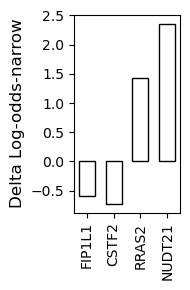

In [19]:
##### plots
fig, axs = plt.subplots(1, figsize=(2,3))

x = np.arange(len(dat['delta_logodds_narrow']))
bars = [item for item in dat['gene']]
axs.bar(x, dat['delta_logodds_narrow'], color='white', edgecolor="black", width=0.6)
axs.set_title('')
axs.set_ylabel('Delta Log-odds-narrow', size=12)
axs.set_xticks(x)
axs.set_xticklabels(bars)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

fig.savefig('plot_APARENT2.png')